In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import seaborn as sns

# Welcome to my Dataset! 
## This Notebook will run you through some stats and visualizations of Running Backs from the 2022 NFL season

The goal is to look at a few rushing and recieving stats of running backs from 2022
Couple of notes:
* Per Pro-Football-Reference (https://www.pro-football-reference.com/about/minimums.htm) only Running Backs that have at least 6.25 carries a game and played in at least 50% of the team's games are significant enough view stats for
    * Likewise, this analysis is in scope of those limitations 
* This analysis only consists of a few stats that Running Backs (RBs) can accumulate, there are many many more ways to analyze RBs

Press play on the below cell:
- A table of all data will be shown 

## Background

Column Names:
* Total_Yds - Total yards gained in the season by player, only rushing and receiving yards taken into account
* Rush_Yds - Rushing yards gained in the season by player
* Rec_Yds - Recieving yards gained in the season by player
* Yds/Rush - Rushing yards gained per rushing attempt by player (higher the number the more efficient the player, and vice versa)
* Receptions/G - Receptions (Catches) made per game by player 
* Total_TDs - Total amount of touchdowns scored in the season by player 
* Age - Age by player

Colors aren't scary!!!
- The more green each cell is, the higher the stat is compared to the rest of the column
- The more pink each cell is, the lower the stat is compared to the rest of the column
    For example Josh Jacobs is the most green in Total_Yds beacuse he had the most total yards on the season among other RBs

In [2]:
rb = pd.read_csv("summarized_view.csv")
Show = rb.style.background_gradient(cmap="PiYG")
Show

,Player,Tm,Total_Yds,Rush_Yds,Rec_Yds,Yds/Rush,Receptions/G,Total_TDs,Age
0,Josh Jacobs,LVR,2053.000000,1653,400.000000,4.900000,3.100000,12.000000,24
1,Derrick Henry,TEN,1936.000000,1538,398.000000,4.400000,2.100000,13.000000,28
2,Christian McCaffrey,2TM,1880.000000,1139,741.000000,4.700000,5.000000,13.000000,26
3,Nick Chubb,CLE,1764.000000,1525,239.000000,5.000000,1.600000,13.000000,27
4,Saquon Barkley,NYG,1650.000000,1312,338.000000,4.400000,3.600000,10.000000,25
5,Austin Ekeler,LAC,1637.000000,915,722.000000,4.500000,6.300000,18.000000,27
6,Aaron Jones,GNB,1516.000000,1121,395.000000,5.300000,3.500000,7.000000,28
7,Dalvin Cook,MIN,1468.000000,1173,295.000000,4.400000,2.300000,10.000000,27
8,Rhamondre Stevenson,NWE,1461.000000,1040,421.000000,5.000000,4.100000,6.000000,24
9,Travis Etienne,JAX,1441.000000,1125,316.000000,5.100000,2.100000,5.000000,23


## Violin plot of players age and efficiency

/var/folders/tc/xk9whcf93kl_0nyd7t8d69100000gn/T/ipykernel_43481/3752054645.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Age", y="Yds/Rush", data=rb, inner=None, palette="Set3")


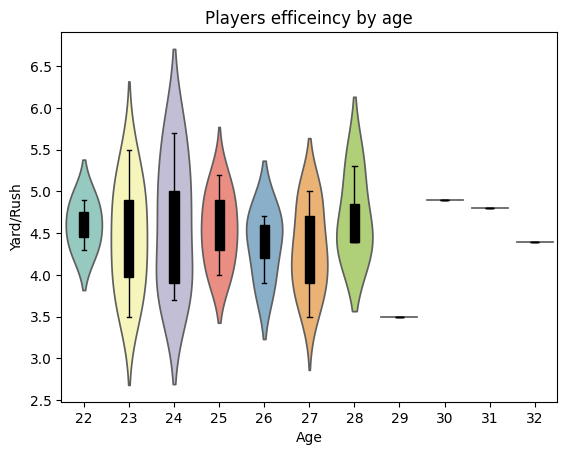

<Figure size 5000x4800 with 0 Axes>

In [3]:
sns.violinplot(x="Age", y="Yds/Rush", data=rb, inner=None, palette="Set3")
sns.boxplot(x="Age", y="Yds/Rush", data=rb, width=0.2, color="black")


plt.xlabel("Age")
plt.ylabel("Yard/Rush")
plt.title("Players efficeincy by age")
plt.figure(figsize=(50, 48))

plt.show()

This plot gives us information about how efficient running backs were last year based on their age. We see that the most efficient RBs were 24, yet the production was volatile. The most consistent RBs were 22, and they seemed to be some of the more efficient RBs (based on medians). How wideness of each 'Violin' shows how many players fell into that category of efficiency. Ages 29, 30, 31, and 32 aren't as useful to us because there seems to be only 1, or close to 1, player to look at.

From a GM's point of view, I could use this when conducting trades/drafting players for my team. It seems like the younger guys can produce just as well as older ones, even without experience. From this, I could come to a conclusion to keep my running back room relatively young in order to potentially gain the most effiency in my runs. 

## Scatter plot of how players receptions per game translates to total touchdowns

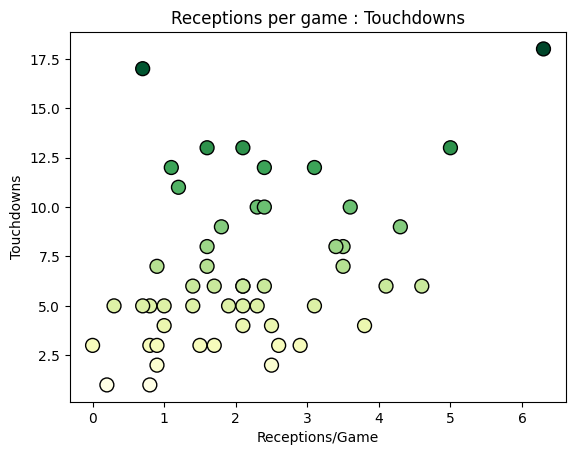

In [4]:
# Values to put into scatter plot
x1 = rb["Receptions/G"]
x1 = x1.values.tolist()
y1 = rb["Total_TDs"]
y1 = y1.values.tolist()
z = y1


plt.scatter(
    x1,
    y1,
    c=y1,
    cmap="YlGn",
    edgecolor="black",
    s=100,
)

plt.xlabel("Receptions/Game")
plt.ylabel("Touchdowns")
plt.title("Receptions per game : Touchdowns")

plt.show()

We see a clear trend in receptions/Game and Touchdowns (disregarding a clear outlier: goal line merchant, Jamal Williams). There seems to be a positive correlation of Receptions/G to Touchdowns, it looks like (mostly) when a player catches more passes in a game, they are likley to have more touchdowns on the season

A fantasy football manager in a PPR leauge might love to see this. Catches and touchdowns are very valuable in these types of fantasy leagues beacuse they help accumulate points greatly. A fantasy manager could use this to help go for (draft or trade) RBs that typically catch more passes to potentially maximize their scoring. 

## Bar plot showing rushing and receiving yards of specific player vs the average for all players in the data
* Enter the player you'd like to look at in 'Player_name' and click play, make sure to have correct spelling!


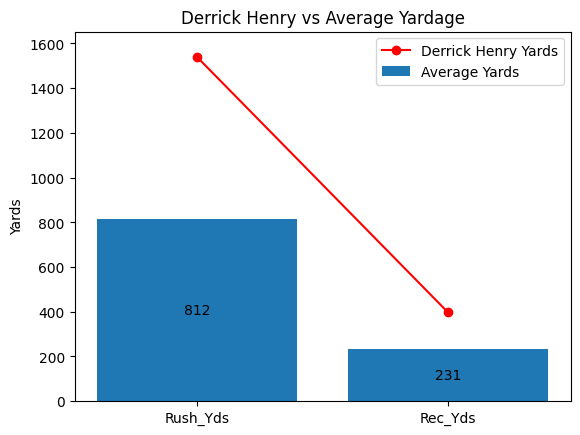

In [5]:
Player_name = "Derrick Henry"


# --------------------------------------------------Background tings-------------------------------------------------------#

# Values for graph
Categories = ["Rush_Yds", "Rec_Yds"]
AvgYds = [rb["Rush_Yds"].mean(), rb["Rec_Yds"].mean()]
Yards_data = rb.loc[
    rb["Player"] == Player_name,
    [
        "Rush_Yds",
        "Rec_Yds",
    ],
]
PYards = Yards_data.values.tolist()[0]


# Graph

# First set
fig, ax1 = plt.subplots()
ax1.bar(Categories, AvgYds, label="Average Yards")
ax1.set_ylabel("Average Yards")


# Second set
ax1.plot(Categories, PYards, label=Player_name + " Yards", color="r", marker="o")
ax1.set_ylabel("Yards")


# Captions
for i, v in enumerate(AvgYds):
    plt.text(i, v / 2, int(v), ha="center", va="center")  # for averages


ax1.legend(loc="upper right")
plt.ylim(0, rb["Rush_Yds"].max())
plt.title(Player_name + " vs Average Yardage")


plt.show()

You will see on the line plot how the player you entered stacks up against the averages of the other RBs in the league (dataset). For example if we look at Derrick(King) Henry we can see he is an exceptional running back. He is much higher than league average for rushing yards, he is close to the top. He is alos a bit higher than league average in recieving yards, but not to the scale of the rushing category.

A GM could use this to see how their RBs are doing compared to the other in the league ('market'). It can aid him/her in deciding whether to trade, cut, bench, or give the ball more to a certain player next year. 

## Radar Chart for Player vs Player comparison of a variety of stats
* This visualization is showing a standardized set the players stats
    - The mean is 0 and -4 to 4 represent how many standard deviations the player is away from the mean of the stat in question
    - -1 to 1 represents 68% of players, -2 to 2 represents 95% of players, -3 to 3 represents 99% of players. This means that someone with a standard deviaiton of 2 97.5th percentile of player, conversely -2 would mean 2.5th percentile of players.
    - Standard deviation value is noted at r:___ in the plot
* Enter the two players you want to view in the Player_name's and click play, make sure to have correct spelling!

In [6]:
Player_name_1 = "Jonathan Taylor"
Player_name_2 = "Derrick Henry"


# -----------------------------------------------Background Tings---------------------------------------#

# Standardized data set of RBs
StandardizedRB = pd.DataFrame()
scaler = StandardScaler()

ctc = ["Player", "Rush_Yds", "Rec_Yds", "Yds/Rush", "Receptions/G", "Total_TDs"]
StandardizedRB = rb[ctc].copy()
Skip = "Player"

for column in StandardizedRB.columns:
    if column == Skip:
        continue
    StandardizedRB[column] = scaler.fit_transform(StandardizedRB[[column]])


# Values for player stats
Yards_data = StandardizedRB.loc[
    rb["Player"] == Player_name_1,
    [
        "Rush_Yds",
        "Rec_Yds",
        "Yds/Rush",
        "Receptions/G",
        "Total_TDs",
    ],
]
Pstats = Yards_data.values.tolist()[0]

Yards_data2 = StandardizedRB.loc[
    rb["Player"] == Player_name_2,
    [
        "Rush_Yds",
        "Rec_Yds",
        "Yds/Rush",
        "Receptions/G",
        "Total_TDs",
    ],
]
Pstats2 = Yards_data2.values.tolist()[0]

categories = ["Rush_Yds", "Rec_Yds", "Yds/Rush", "Receptions/G", "Total_TDs"]


# Radar plot
fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(r=Pstats, theta=categories, fill="toself", name=Player_name_1)
)


fig.add_trace(
    go.Scatterpolar(r=Pstats2, theta=categories, fill="toself", name=Player_name_2)
)

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[-4, 4])),
    showlegend=False,
    width=700,
    height=600,
)

fig.show()

It is easy to see here that in 2022 Austin Ekeler was the much better player. He was in (close to) the 99.8th percentile in three different stat categories. While Jonathan Taylor was about average or below average in every stat. The Monster that is Austin Ekeler *literally* engulfes Jonathan Taylor in the visualization

A GM can use this to analyze aspect of a trade of two specific players, looking at each of their strengths and coming to a conclusion of who/who not to trade. A fantasy football manager could also use this when drafting or trading a player. For example if the manager wants to have a RB who has a lot of receptions, they can compare two players they are about to draft and make a decision based off of it.

# A few confounding variables

A couple things to take into account when using this dataset and analyzations: 

* Injuries: Reported or unreported injuries can can greatly impact how a running back performs.
* Team Strength: The overall performance and strength of the running back's team can influence individual statistics. A strong team may lead to more opportunities for the running back to score or gain yards.
* Offensive Line Quality: The quality of the offensive line, including blocking and protection, significantly affects a running back's performance. A strong offensive line can create more running lanes and provide better protection for the quarterback.
* Quarterback Play: The performance of the quarterback can impact running back statistics, especially in play-action passing situations or when the quarterback's threat as a passer affects defensive strategies.
* Game Script: The score and game situation can affect play-calling. In games where a team is trailing, running backs may receive fewer rushing attempts.
* Weather Conditions: Weather can impact the game, affecting running back performance, especially in adverse conditions like rain, snow, or extreme heat.
* Opponent Defense: The quality of the opposing defense can influence running back statistics. Strong defenses may limit rushing yards and touchdowns.
* Coaching Strategies: Coaching decisions, such as run-pass balance against certain teams, can impact a running back's opportunities and performance.
* Fumbles and Turnovers: Fumbles and turnovers can lead to reduced playing time and opportunities for running backs.
* Red Zone Opportunities: The number of red zone (inside the opponent's 20-yard line) opportunities can affect touchdown statistics.
* Contract Status: Contract situations and incentives in a player's contract can influence performance.
* Time of Possession: The time of possession by each team can impact a running back's opportunities and touches.









